<a href="https://colab.research.google.com/github/RaziehSh1987/thesis_-StridedTransformer-Pose3D/blob/main/Razieh_thesis_v8_movenet_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

In [5]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import os.path
from PIL import Image
import pandas as pd


In [6]:
path_images_original='/content/drive/MyDrive/BishopThesis3/CamerasFrames/'
path_images='/content/drive/MyDrive/BishopThesis3/CropedPersons/'

path_model='/content/drive/MyDrive/BishopThesis2/'

interpreter=tf.lite.Interpreter(model_path=path_model+'lite-model_movenet_singlepose_lightning_3.tflite')
## https://www.tensorflow.org/api_docs/python/tf/lite/Interpreter
# https://medium.com/analytics-vidhya/introduction-to-tf-lite-3a02d753939
# interpreter.set_tensor()

# -----------------
# output_details=interpreter.get_output_details()
# interpreter.resize_tensor_input(output_details[0]['index'], (24, 6))
# -----------------------

interpreter.allocate_tensors()


# **Read  Tensors for Output**

# **1**

In [ ]:
# path_tensor_keyPoints='/content/drive/MyDrive/BishopThesis2/'
# train=pd.read_csv(path_tensor_keyPoints+'AnimationTransform11.csv')
# train

# **2**

In [ ]:

# import csv
# results = []

# with open(path_tensor_keyPoints+'AnimationTransform11.csv') as csvfile:
#     next(csvfile)
#     interestingrows=[row for idx, row in enumerate(csvfile) if idx in range(0,17)]#33)]#read the first 24 row

#     reader = csv.reader(interestingrows, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats

#     for row in reader: # each row is a list 
#         results.append(row[2:5])
  
   

# results

# **3**

In [ ]:

# # add 2 dim 1 to the tensor
# # results=np.expand_dims(np.expand_dims(results,axis=0),axis=0)
# results=np.array(results)
# results.shape
# print(results)

# **4**

In [ ]:
# # results=np.expand_dims(results,axis=0)
# results=np.expand_dims(np.expand_dims(results,axis=0),axis=1)

# print(results.shape)
# print(results)

 

**read image for input of model(Test)**

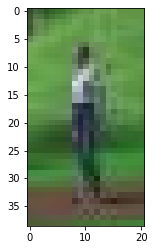

In [ ]:
# frame1 = Image.open(path_images + '0001.jpg')
# draw_connections(np.array(frame1),np.squeeze(results),EDGE_COLORS,0.4)
# draw_connections(np.array(frame1),np.squeeze(results),EDGE_COLORS,0.4)
# plt.imshow(frame1)

 **Draw Keypoints on Input image**

In [7]:
def draw_keypoints(frame,keypoints,confidence_threshold): 
  x,y,c=frame.shape
  shaped=np.squeeze(np.multiply(keypoints,[x,y,1])) #get all keypoints(x,y,z) of all joints(17 joints) from 1 frame

  for kp in shaped:
     ky,kx,kp_conf=kp #put x,y,z of each joint into ky,kx,kp_conf
     cv2.circle(frame,(int(kx),int(ky)),1,(0,255,0), -1)


**Draw Edges on Input image**

 [nose, left eye,
right eye, left ear, right ear, left shoulder, right shoulder, left elbow, right elbow, left wrist,
right wrist, left hip, right hip, left knee, right knee, left ankle, right ankle])

# **1**

In [8]:
# dictiory determined which coordinate connected to second cordinate (with color m magentic or ciyan):  (0,1) --> means the first row of coordinates in shaped that is nose is connected to second row which is left eye
EDGE_COLORS = {

    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'c',
    (6, 8): 'm',
    (8, 10): 'c',
    (5, 6): 'm',
    (5, 11): 'c',
    (6, 12): 'm',
    (11, 12): 'c',
    (11, 13): 'm',
    (13, 15): 'c',
    (12, 14): 'm',
    (14, 16): 'c'
}

# **2**

In [9]:
# function to draw connections
def draw_connections(frame,keypoints,edges,confidence_threshold):
   x,y,c=frame.shape
   shaped=np.squeeze(np.multiply(keypoints,[x,y,1])) #get all keypoints(x,y,z) of all joints(17 joints) from 1 frame

   for edge,color in EDGE_COLORS.items():
     p1,p2=edge
     y1,x1,c1=shaped[p1]#put x,y,z of each joint into y,x,c for first point to draw line
     y2,x2,c2=shaped[p2] #put x,y,z of each joint into y,x,c for second point to draw line
    
     if (c1>confidence_threshold) & (c2>confidence_threshold):
       cv2.line(frame,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0), 1)#draw connection between joints

#**load and reshape images**


# **1**

In [10]:
def load_images(path):
    images_resize = []
    keypoints_list=[]
    frames=[]
    img_original=[]
    file_name_list=[]
    for filename in (sorted(os.listdir(path))):
        # print(filename)
        frame = Image.open(path + filename) #original_image(91, 48, 3)
        frame=np.array(frame)

        file_name_list.append(filename)
        img_original.append(frame.copy())

        img=frame.copy()
        img=tf.image.resize_with_pad(np.expand_dims(img,axis=0),192,192) #after expand dim (1, 91, 48, 3) #after resize (1, 192, 192, 3)
        input_image=tf.cast(img,dtype=tf.float32) #change type of image based on type of input image for lightening model to fliat32
  # ---------- 
        # output_tensor=tf.cast(results,dtype=tf.float32)
        # print(output_tensor)
  # ------------
        #  --------
        input_details=interpreter.get_input_details()
        output_details=interpreter.get_output_details()
    
##        print(f'in function:{output_details[0]}')
# -----------


        interpreter.set_tensor(input_details[0]['index'],input_image) #or np.array(input_images[1300]) #set value for 'index' in 'input details' field

        

# ----------

        interpreter.invoke() #call for predict

        # ****************if i want to usemy keypoint--> i must set keypoints by this format age give them to 'keypoints_with_scores'
        keypoints_with_scores=interpreter.get_tensor(output_details[0]['index'])
        keypoints_list.append(keypoints_with_scores)

        draw_connections(frame,keypoints_with_scores,EDGE_COLORS,0.4)
        draw_keypoints(frame,keypoints_with_scores,0.4)



        images_resize.append(input_image)
        frames.append(frame)
   
    return images_resize,frames,keypoints_list,img_original,file_name_list

# **2**

In [11]:
# call load images function and resize them
Lst_input_images=[]
Lst_frame_skeleton=[]
Lst_keypoints_list=[]
Lst_img_croped_original=[]
Lst_file_name=[]

for camera_num in range(1,5):#hanooz ino run nakardam
  input_images,frame_skeleton,keypoints_list,img_croped_original,file_name_list=(load_images(path_images+f'camera{camera_num}/'+'person/'))
  print(len(file_name_list))

  Lst_input_images.append(input_images)
  Lst_frame_skeleton.append(frame_skeleton)
  Lst_keypoints_list.append(keypoints_list)
  Lst_img_croped_original.append(img_croped_original)
  Lst_file_name.append(file_name_list)

  # print(f"Skeleton Prediction for camera{camera_num} is done={keypoints_list[903]}")



931
930
931
931


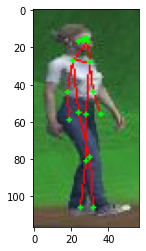

In [12]:
plt.imshow( Lst_frame_skeleton[3][300])

 img_original of camera 2=
66
 Lst_frame_skeleton of camera 2=
66


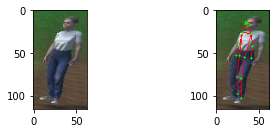

In [13]:
plt.subplot(2,2,1)
print(f" img_original of camera 2=\n{len( Lst_img_croped_original[1][800])}")
plt.imshow( Lst_img_croped_original[2][100])

plt.subplot(2,2,2)
print(f" Lst_frame_skeleton of camera 2=\n{len( Lst_img_croped_original[1][800])}")
plt.imshow( Lst_frame_skeleton[2][100])

931
camera 1 detected=931
 camera 2 detected=930
 camera 3 detected=931
 camera 4 detected=931



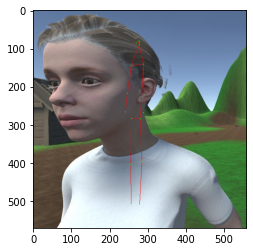

In [ ]:
from IPython.lib.display import isfile
from numpy.ma.core import maximum
print(len(Lst_frame_skeleton[3]))
if len(Lst_img_croped_original[0])==len(Lst_img_croped_original[1])==len(Lst_img_croped_original[2])==len(Lst_img_croped_original[3]):
    print(f"all cameras have a same number of images= {len(Lst_img_croped_original[0])}")
else:
    print(f'camera 1 detected={len(Lst_img_croped_original[0])}\n camera 2 detected={len(Lst_img_croped_original[1])}\n camera 3 detected={len(Lst_img_croped_original[2])}\n camera 4 detected={len(Lst_img_croped_original[3])}\n')
    # max_list=[len(Lst_img_original[0]),len(Lst_img_original[1]),len(Lst_img_original[2]),len(Lst_img_original[3])]
    # max=maximum(max_list)
    # max_index=max_list.index(max)
    # print(f'maximum number of image in camera={max} \n and its index is={max_index} ')

    path_cam1=path_images+'camera1/person/'
    path_cam2=path_images+'camera2/person/'
    path_cam3=path_images+'camera3/person/'
    path_cam4=path_images+'camera4/person/'

    Lst_avg=[]

    for filename in (sorted(os.listdir(path_images_original+'1/'))):
      file_indx_cams=Lst_file_name[0].index(filename)

      if os.path.isfile(path_cam1+filename):
        file_indx_cams=Lst_file_name[0].index(filename)
        try:
          Lst_avg.append(Lst_keypoints_list[0][file_indx_cams])
        except:
          Lst_avg.append(None)
          print(f"there is no {file_indx_cams} in camera 1")
      
      if os.path.isfile(path_cam2+filename):
        file_indx_cams=Lst_file_name[1].index(filename)
        try:
          Lst_avg.append(Lst_keypoints_list[1][file_indx_cams])
        except:
          Lst_avg.append(None)
          print(f"there is no {file_indx_cams} in camera 2")

      if os.path.isfile(path_cam3+filename):
        file_indx_cams=Lst_file_name[2].index(filename)
        try:
          Lst_avg.append(Lst_keypoints_list[2][file_indx_cams])
        except:
          Lst_avg.append(None)
          print(f"there is no {file_indx_cams} in camera 3")
  
      if os.path.isfile(path_cam4+filename):
        file_indx_cams=Lst_file_name[3].index(filename)
        try:
          Lst_avg.append(Lst_keypoints_list[3][file_indx_cams])
        except:
          Lst_avg.append(None)
          print(f"there is no {file_indx_cams} in camera 4")


      avg_key_point=tf.keras.layers.Average()([np.squeeze(Lst_avg[0]),np.squeeze(Lst_avg[1]),np.squeeze(Lst_avg[2]),np.squeeze(Lst_avg[3])])
      avg_np_key_point=avg_key_point.numpy().tolist()
      # print(np.average(key_point_cam1,key_point_cam2,axis=))

      draw_connections(Lst_img_croped_original[0][file_indx_cams],avg_key_point,EDGE_COLORS,0.4)
      draw_keypoints(Lst_img_croped_original[0][file_indx_cams],avg_key_point,0.4)
      plt.imshow(Lst_img_croped_original[0][file_indx_cams])





        
      
     

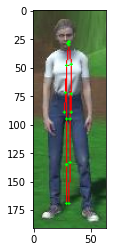

In [ ]:
# img after Average
plt.imshow(Lst_img_croped_original[0][800])

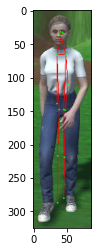

In [14]:
# img befor Average
plt.imshow(Lst_frame_skeleton[0][900])

# **3**

[[[[0.17433146 0.5882207  0.58395153]
   [0.15186918 0.5867273  0.3680031 ]
   [0.15039545 0.59165597 0.46640593]
   [0.1456332  0.5335336  0.4440765 ]
   [0.14356323 0.5537344  0.56088924]
   [0.23592421 0.45013994 0.49831346]
   [0.24023996 0.5692778  0.6203762 ]
   [0.385987   0.43724263 0.35575548]
   [0.3840509  0.57966065 0.5993762 ]
   [0.52188456 0.4832992  0.24733754]
   [0.5068755  0.6040225  0.50113744]
   [0.49099275 0.44531593 0.77584004]
   [0.49239087 0.5157771  0.8092158 ]
   [0.67801803 0.44170398 0.8249784 ]
   [0.6876082  0.5209919  0.7916553 ]
   [0.8759724  0.4019532  0.75841147]
   [0.9019878  0.47942728 0.68404377]]]]


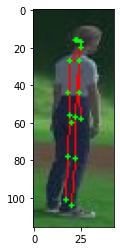

In [15]:
plt.imshow(frame_skeleton[800])
print(keypoints_list[800])

# **------conver to 3d:-----**

## **1)Yichen 3D model**

In [ ]:
#CLONE GITHUB---------
#GPU colab ro active konam---
!git clone https://github.com/Vegetebird/StridedTransformer-Pose3D


In [2]:
# COPY DATASETS-------------
%cp  /content/drive/MyDrive/BishopThesis5-3d-coordinate/Dataset_human3.6M/data_2d_h36m_cpn_ft_h36m_dbb.npz  /content/StridedTransformer-Pose3D/dataset
%cp /content/drive/MyDrive/BishopThesis5-3d-coordinate/Dataset_human3.6M/data_2d_h36m_gt.npz   /content/StridedTransformer-Pose3D/dataset
%cp /content/drive/MyDrive/BishopThesis5-3d-coordinate/Dataset_human3.6M/data_3d_h36m.npz     /content/StridedTransformer-Pose3D/dataset

In [ ]:
##COPY PRE_TRAINED MODEL------------
!pwd
%cd /content/StridedTransformer-Pose3D/checkpoint
!mkdir pretrained
%cd  pretrained
%cp /content/drive/MyDrive/BishopThesis5-3d-coordinate/pre-train-model/no_refine_4365.pth  /content/StridedTransformer-Pose3D/checkpoint/pretrained
%cp /content/drive/MyDrive/BishopThesis5-3d-coordinate/pre-train-model/refine_4365.pth  /content/StridedTransformer-Pose3D/checkpoint/pretrained


In [ ]:
## TEST THE MODEL----------
# !pip install einops
# !pwd
# %cd ../..
!python main.py --test --refine --reload --refine_reload --previous_dir 'checkpoint/pretrained'


In [21]:
#bad az train dastoore balayi ino copy kardam k napare
# %cp /content/StridedTransformer-Pose3D/checkpoint/1218_0734_17_351_no/opt.txt  /content/drive/MyDrive/BishopThesis5-3d-coordinate/checkpoint-trained-model/1218_0734_17_351_no
# %cp /content/StridedTransformer-Pose3D/checkpoint/1218_0734_17_351_no/train.log  /content/drive/MyDrive/BishopThesis5-3d-coordinate/checkpoint-trained-model/1218_0734_17_351_no

In [ ]:
##TRAIN THE MODEL(To train on Human3.6M:)------
# !python main.py #--exp frame_skeleton[800]
## After training for several epochs, add refine module:------
# !python main.py --refine --lr 1e-5 --reload --previous_dir /content/drive/MyDrive/BishopThesis5-3d-coordinate/MyModel

## **---------------------------------Explain all above code:(it doesnt need to run)---------------------**

In [ ]:
# ------show information produce datas----------
print(frame_skeleton[1300].shape)
print(np.expand_dims(frame_skeleton[1300],axis=0).shape) #add new dimension in the first (axis=0) place
print(input_images[1300].shape)
print(input_images[1300].dtype)



(91, 48, 3)
(1, 91, 48, 3)
(1, 192, 192, 3)
<dtype: 'float32'>


**setup input and output**

In [ ]:
input_details=interpreter.get_input_details()
output_details=interpreter.get_output_details()

# requiremnet of input and output of  Movement model
print(f'input details of mevenet tensorflow model:\n{interpreter.get_input_details()}')
print(f'output details of mevenet tensorflow model:\n{interpreter.get_output_details()}')


input details of mevenet tensorflow model:
[{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 192, 192,   3], dtype=int32), 'shape_signature': array([  1, 192, 192,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output details of mevenet tensorflow model:
[{'name': 'StatefulPartitionedCall:0', 'index': 312, 'shape': array([ 1,  1, 17,  3], dtype=int32), 'shape_signature': array([ 1,  1, 17,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


**Make prediction**

keypoint of 17 joints for one frame= 
[[0.16113764 0.43456656 0.6630484 ]
 [0.14466275 0.45307636 0.5067115 ]
 [0.14594166 0.42310947 0.6695062 ]
 [0.15571778 0.4888762  0.86352277]
 [0.14978682 0.4205833  0.6939702 ]
 [0.23108977 0.5277576  0.83495146]
 [0.23430789 0.390403   0.8507896 ]
 [0.28233355 0.6486557  0.57678246]
 [0.32797623 0.33739123 0.6433003 ]
 [0.36558956 0.6346883  0.33009037]
 [0.31684154 0.29525343 0.63307   ]
 [0.48034853 0.51140326 0.89906806]
 [0.48487478 0.46218276 0.8329629 ]
 [0.6557073  0.39856726 0.71880853]
 [0.67723334 0.48464867 0.65055966]
 [0.85077596 0.42973238 0.7136436 ]
 [0.86153597 0.471911   0.51030654]]
tensor size of output=
(1, 1, 17, 3)
right_eye=
[0.14594166 0.42310947 0.6695062 ]


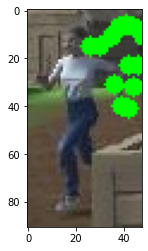

In [ ]:
interpreter.set_tensor(input_details[0]['index'],input_images[1300]) #or np.array(input_images[1300]) #set value for 'index' in 'input details' field
interpreter.invoke() #call for predict

# ****************if i want to usemy keypoint--> i must set keypoints by this format age give them to 'keypoints_with_scores'
keypoints_with_scores=interpreter.get_tensor(output_details[0]['index'])

draw_keypoints(frame_skeleton[1300],keypoints_with_scores,0.4)
plt.imshow(frame_skeleton[1300])

print(f'keypoint of 17 joints for one frame= \n{keypoints_with_scores[0][0]}' )#[0]--> access to first array and [?] [0]-->access to  second array #forexample [0][0][2]--> access to cordinate(x,y,z) of right eye

print(f'tensor size of output=\n{keypoints_with_scores.shape}')

right_eye=keypoints_with_scores[0][0][2]
print(f'right_eye=\n{right_eye}')



**Draw keypoints**

In [ ]:
print(f'real location of eye in 2D input image =\n{np.array(right_eye[:2]*[91,48]).astype(int)}')
# np.squeeze(keypoints_with_scores[2])  <=is equal to=>  (keypoints_with_scores[0][0][2])
print(np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']),[91,48,1])).astype(int))#1st and 2th column multiply [91,48] --- and 3sd column(confidence axis) mulyiply 1

real location of eye in 2D input image =
[13 20]
[[14 20  0]
 [13 21  0]
 [13 20  0]
 [14 23  0]
 [13 20  0]
 [21 25  0]
 [21 18  0]
 [25 31  0]
 [29 16  0]
 [33 30  0]
 [28 14  0]
 [43 24  0]
 [44 22  0]
 [59 19  0]
 [61 23  0]
 [77 20  0]
 [78 22  0]]
